In [1]:
from megane.predictor import Predictor
from PIL import Image
import torch
from torchvision.transforms import functional as TF
import numpy as np
from megane import transforms
from megane import visualize
from megane import configs
from megane import loaders
from megane import trainer
import numpy as np
from megane.models import DBNet

In [46]:
cfg = configs.read_config("./configs/db_mobilenet_v3_large.yml")
cfg['weights'] = 'storage/weights/db_mobilenet_v3_large-latest.pt'
# cfg['weights'] = 'storage/weights/'
# cfg['image_width'] = 1024
# cfg['image_height'] = 1024
cfg['expand_ratio'] = 2
cfg['min_threshold'] = .7
# cfg['min_box_size'] = 10
# cfg['weights'] = 'https://github.com/ndgnuh/megane/releases/download/weights-v2/db_mobilenet_v3_large_big.pt'
print(cfg)


{'backbone': 'mobilenet_v3_large', 'head': 'dbnet', 'hidden_size': 96, 'num_classes': 1, 'weights': 'storage/weights/db_mobilenet_v3_large-latest.pt', 'image_width': 768, 'image_height': 768, 'shrink_ratio': 0.4, 'expand_ratio': 2, 'min_box_size': 3, 'min_score': 0.6, 'min_threshold': 0.7, 'name': 'db_mobilenet_v3_large'}


In [47]:
predictor = Predictor(cfg)
predictor.model = predictor.model.eval();

In [52]:
# image = Image.open("/tmp/test.png").convert("RGB")
# image = Image.open("toybox/funsd-format.png").convert("RGB")
image = Image.open("toybox/word-level-megane/toy-detection-data.png").convert("RGB")
# image = Image.open("toybox/word-level-megane/dense-01.png").convert("RGB")
# image = Image.open("arxiv/train/710de56a-c67c-5eb-000000001.jpg").convert("RGB")
# image = Image.open("data/business_card/images/IMG_20220117_142150.jpg").convert("RGB")
# image = Image.open("data/business_card/images/IMG_20220117_143322.jpg").convert("RGB")
# image.thumbnail((2048, 2048))
# image = image.rotate(5)
# image = Image.open("/tmp/test.png").convert("RGB")

In [53]:
with torch.no_grad():
    polygons, angles, labels, scores, proba_maps = predictor.predict(image)

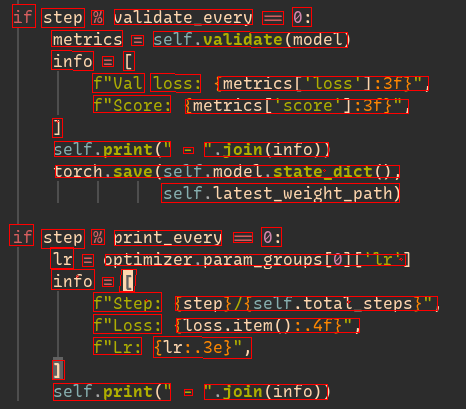

In [54]:
visualize.draw_polygons(image, polygons, outline=(255, 0, 0))

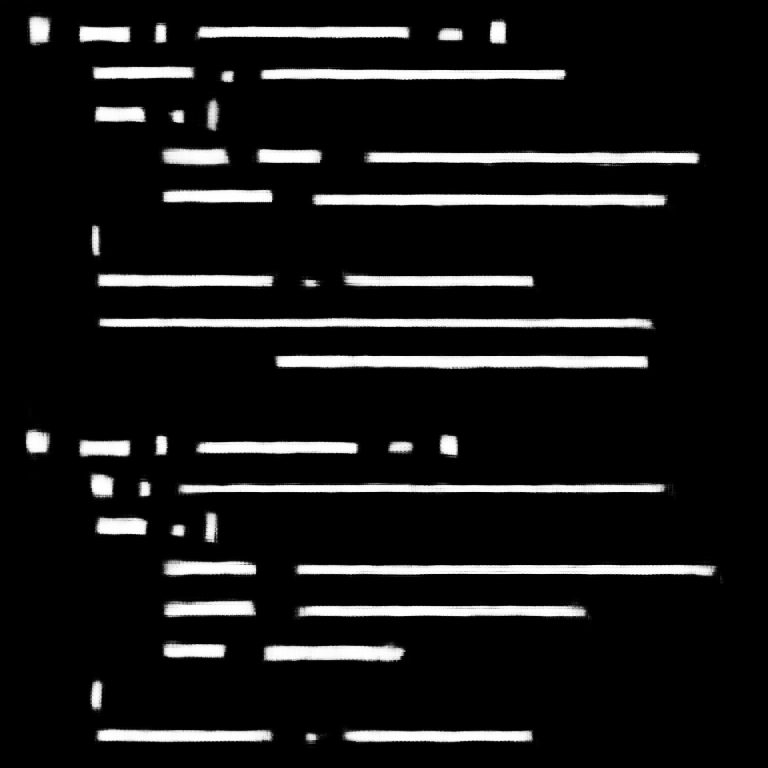

In [55]:
proba_map = TF.to_pil_image((torch.tensor(proba_maps)))
# proba_map = np.array(proba_map)
# Image.fromarray(proba_map)
proba_map